In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns",None)

In [4]:
df = pd.read_csv("churntrain.csv")
df1 = pd.read_csv("churntest.csv")

In [8]:
print(df.shape)

(3333, 21)


In [9]:
print(df1.shape)

(425, 20)


In [6]:
df1.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2


In [7]:
df.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.isnull().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!="O" and df[feature].dtype!="Bool"]
print(numerical_features)

['Account_Length', 'Area_Code', 'Phone_No', 'No_Vmail_Messages', 'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge', 'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge', 'No_CS_Calls']


<ipython-input-36-3c4ea0f2f7d6>:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  numerical_features = [feature for feature in df.columns if df[feature].dtype!="O" and df[feature].dtype!="Bool"]


In [37]:
df[numerical_features].head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,128,415,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [38]:
print("the total number of numerical features are {}".format(len(numerical_features)))

the total number of numerical features are 17


In [39]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]
print(categorical_features)

['State', 'International_Plan', 'Voice_Mail_Plan']


In [40]:
print("the total number of categorical features are {}".format(len(categorical_features)))

the total number of categorical features are 3


In [41]:
correla = df.corr()
correla

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
Account_Length,1.000000,-0.012463,0.004808,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area_Code,-0.012463,1.000000,-0.014029,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Phone_No,0.004808,-0.014029,1.000000,0.022569,0.012014,-0.005812,0.012009,-0.017710,0.003519,-0.017688,-0.008047,0.014034,-0.008049,-0.010269,-0.017676,-0.010245,0.033847,0.005730
No_Vmail_Messages,-0.004628,-0.001994,0.022569,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total_Day_minutes,0.006216,-0.008264,0.012014,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total_Day_Calls,0.038470,-0.009646,-0.005812,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total_Day_charge,0.006214,-0.008264,0.012009,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total_Eve_Minutes,-0.006757,0.003580,-0.017710,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total_Eve_Calls,0.019260,-0.011886,0.003519,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total_Eve_Charge,-0.006745,0.003607,-0.017688,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


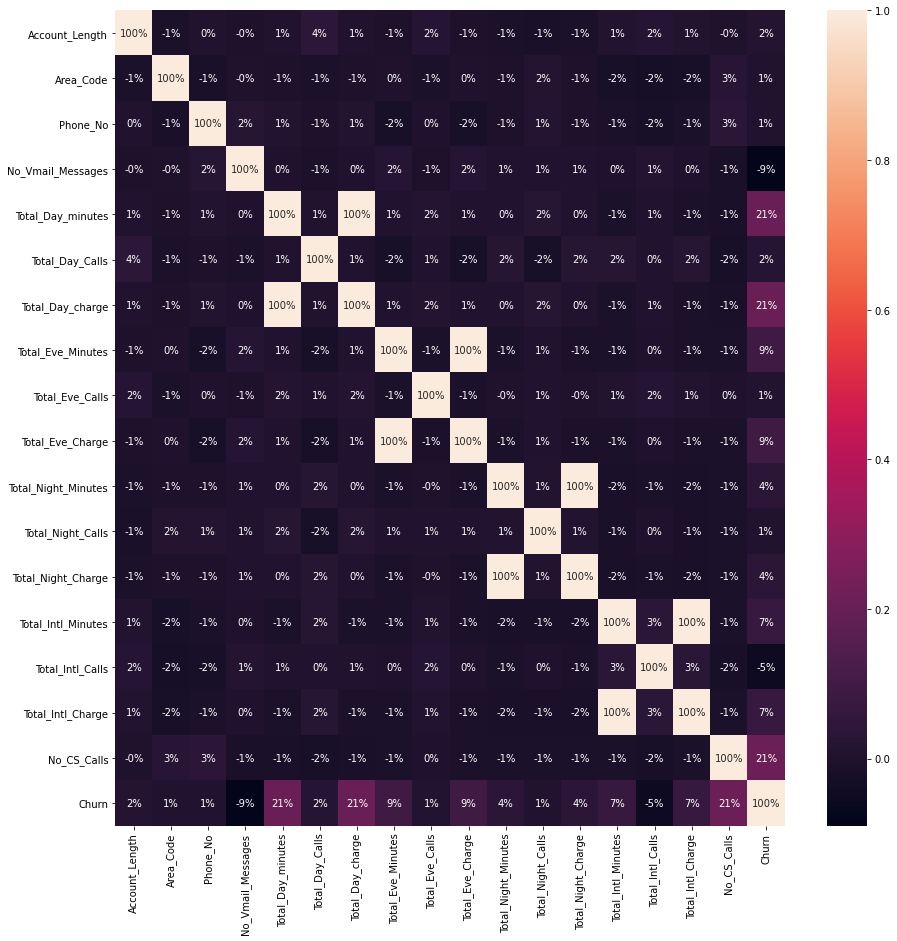

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sn.heatmap(correla,annot=True,fmt='.0%')
plt.show()

In [43]:
df[categorical_features].head()

,State,International_Plan,Voice_Mail_Plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


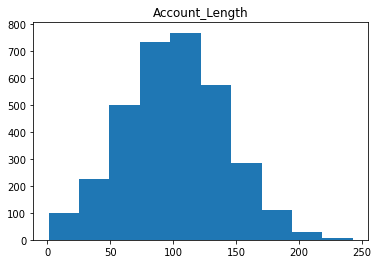

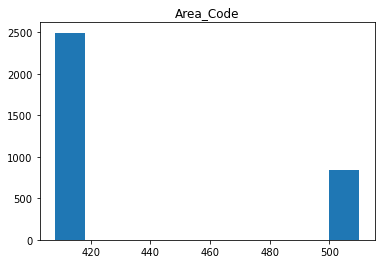

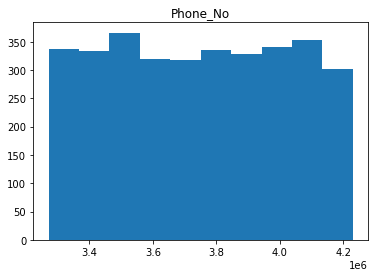

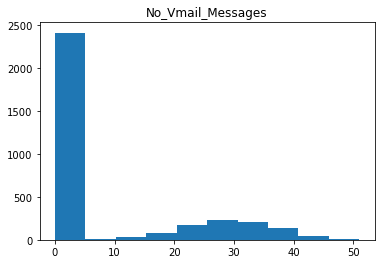

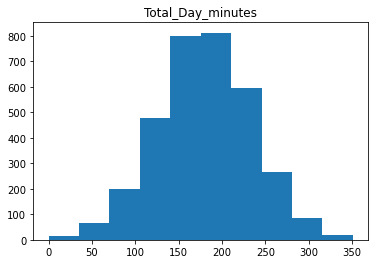

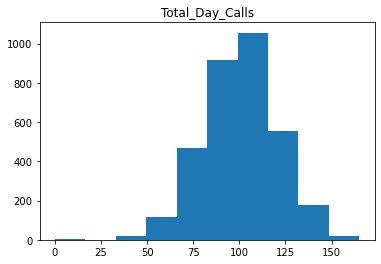

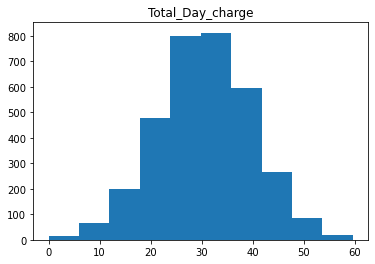

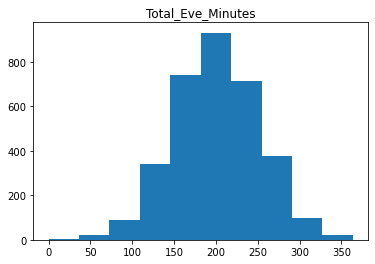

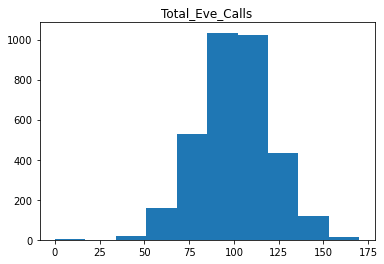

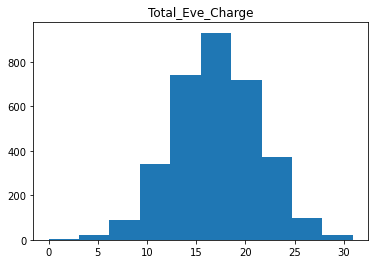

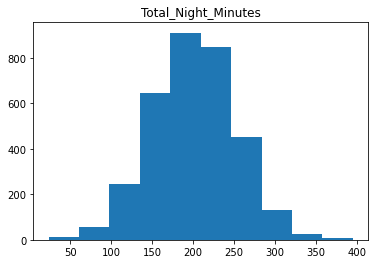

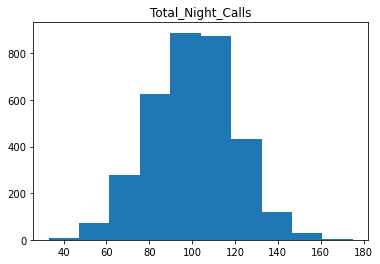

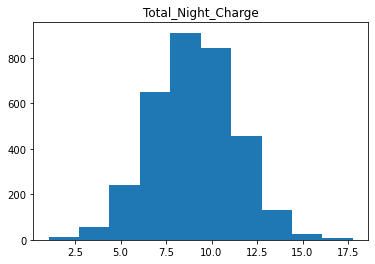

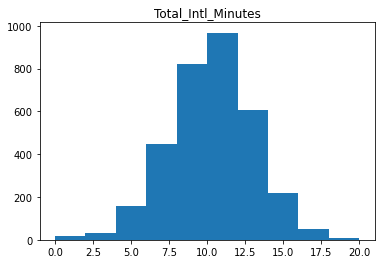

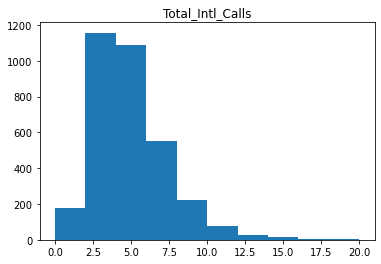

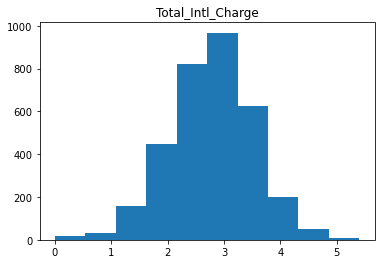

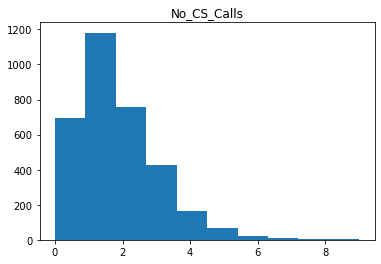

In [44]:
for feature in numerical_features:
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

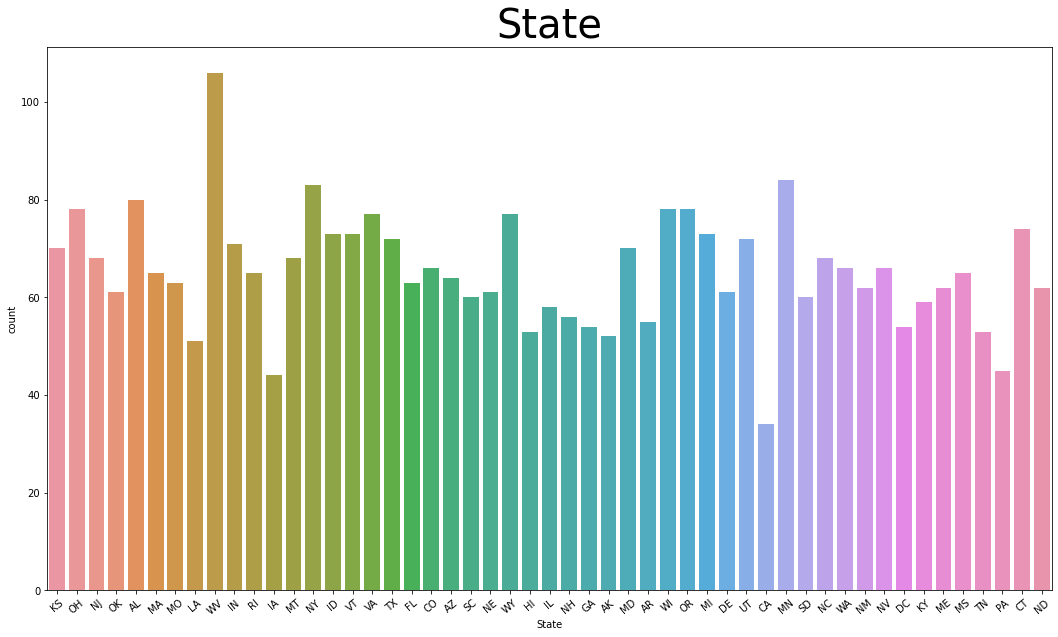

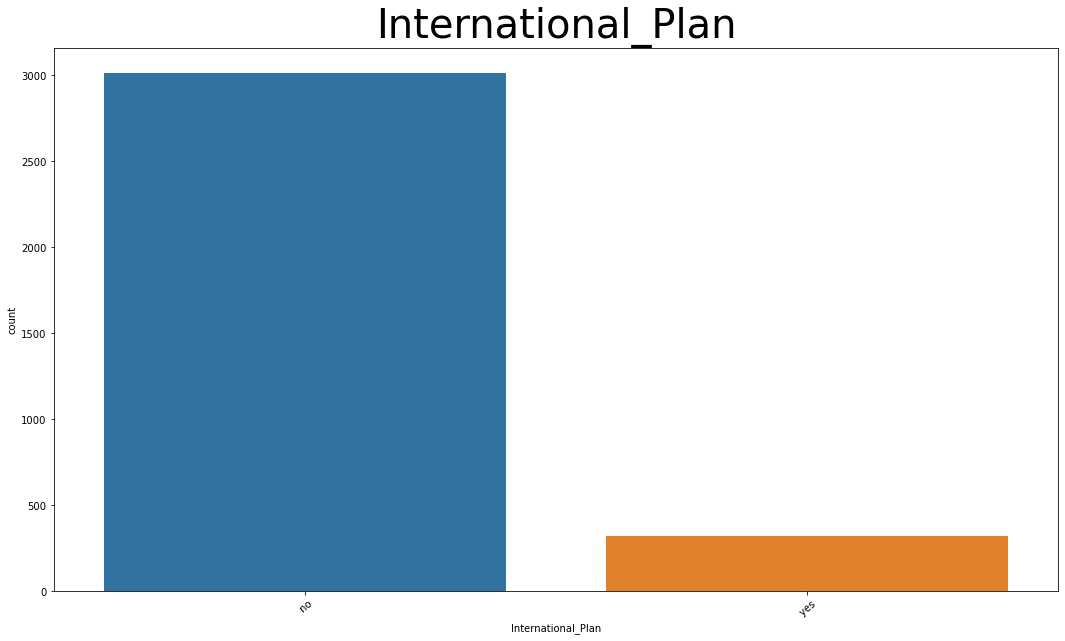

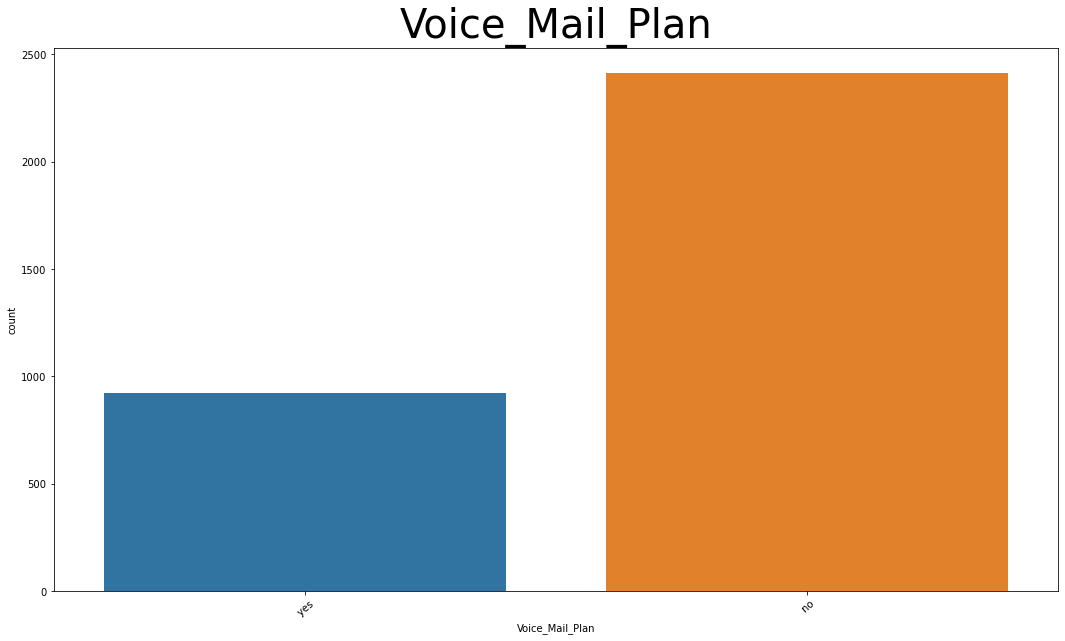

In [50]:
for feature in categorical_features:
    plt.figure(figsize=[18,10])
    plt.xticks(rotation=40)
    sn.countplot(df[feature])
    plt.title(feature,fontsize=40)
    plt.show()

In [60]:
new_df = df[numerical_features]
new_df.head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,128,415,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [61]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_df_transfom = scale.fit_transform(new_df)

In [64]:
new_df = pd.DataFrame(new_df_transfom,columns=new_df.columns)
new_df.head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,0.524793,0.068627,0.577324,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111
1,0.438017,0.068627,0.465252,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111
2,0.561983,0.068627,0.324185,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000
3,0.342975,0.000000,0.509895,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222
4,0.305785,0.068627,0.037092,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333


In [65]:
new_df1 = df[categorical_features]
new_df1.head()

,State,International_Plan,Voice_Mail_Plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


In [69]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
new_df1["State"] = encode.fit_transform(new_df1["State"])
new_df1["International_Plan"] = encode.fit_transform(new_df1["International_Plan"])
new_df1["Voice_Mail_Plan"] = encode.fit_transform(new_df1["Voice_Mail_Plan"])

<ipython-input-69-de1f25051aa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1["State"] = encode.fit_transform(new_df1["State"])
<ipython-input-69-de1f25051aa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1["International_Plan"] = encode.fit_transform(new_df1["International_Plan"])
<ipython-input-69-de1f25051aa7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [70]:
new_df1.head()

,State,International_Plan,Voice_Mail_Plan
0,16,0,1
1,35,0,1
2,31,0,0
3,35,1,0
4,36,1,0


In [72]:
train = pd.concat([new_df,new_df1],axis=1)
train.head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,State,International_Plan,Voice_Mail_Plan
0,0.524793,0.068627,0.577324,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,16,0,1
1,0.438017,0.068627,0.465252,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,35,0,1
2,0.561983,0.068627,0.324185,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,31,0,0
3,0.342975,0.000000,0.509895,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,35,1,0
4,0.305785,0.068627,0.037092,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,36,1,0


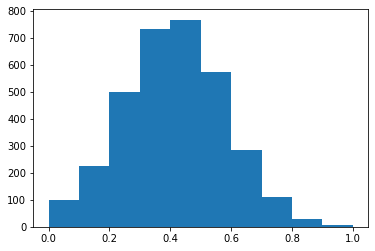

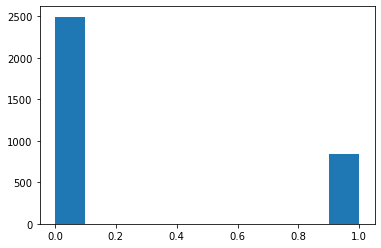

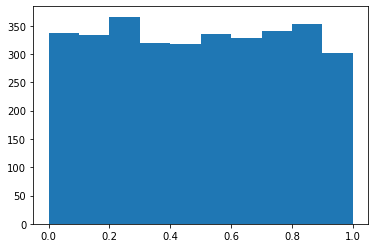

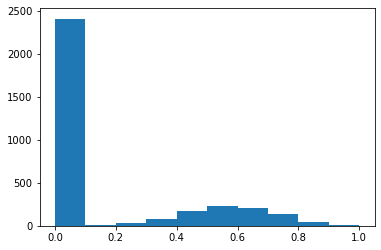

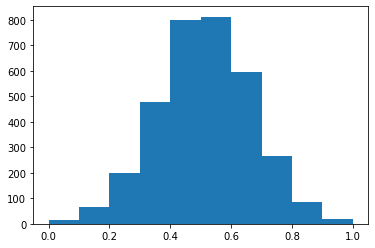

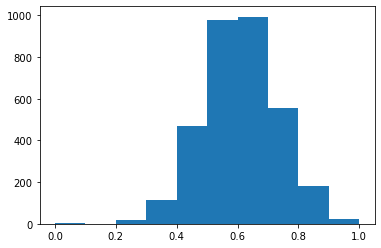

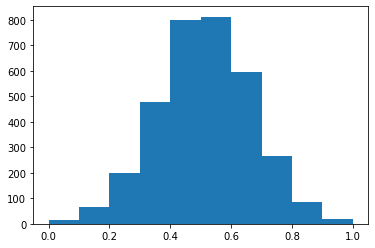

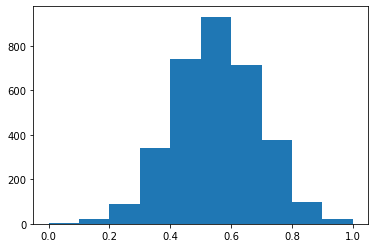

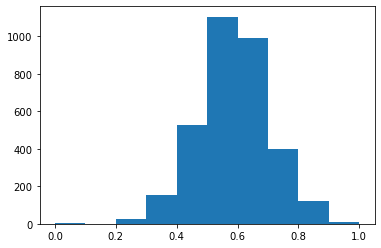

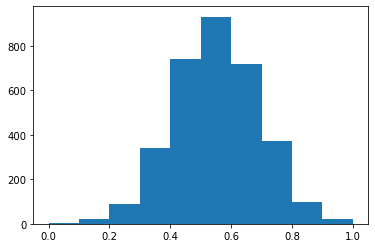

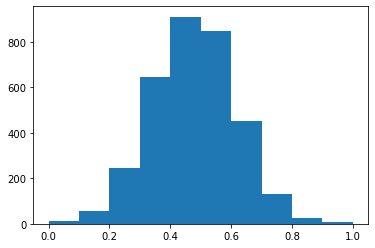

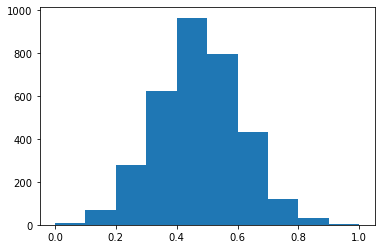

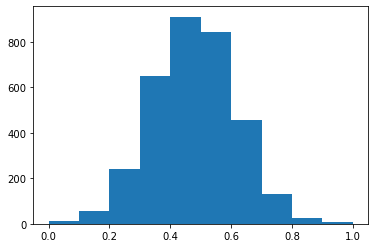

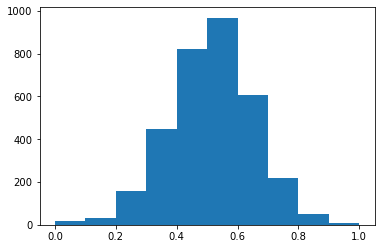

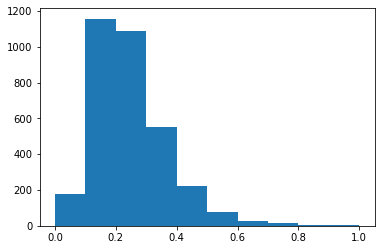

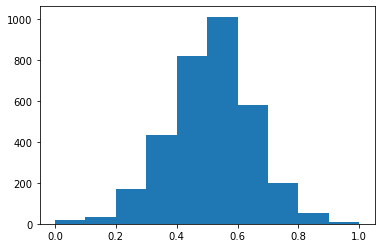

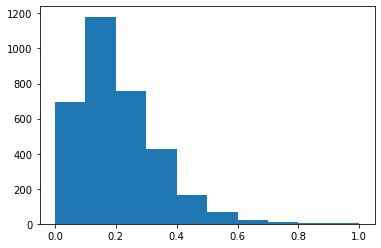

In [76]:
for feature in new_df.columns:
    plt.hist(new_df[feature])
    plt.show()
    

In [79]:
import numpy as np
df["Churn"] = np.where(df["Churn"]==False,0,1)
df.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [80]:
train["Churn"] = df["Churn"]

In [81]:
train.head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,State,International_Plan,Voice_Mail_Plan,Churn
0,0.524793,0.068627,0.577324,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,16,0,1,0
1,0.438017,0.068627,0.465252,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,35,0,1,0
2,0.561983,0.068627,0.324185,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,31,0,0,0
3,0.342975,0.000000,0.509895,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,35,1,0,0
4,0.305785,0.068627,0.037092,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,36,1,0,0


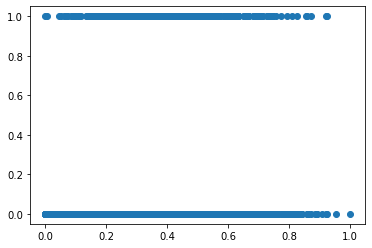

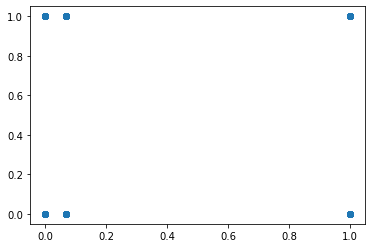

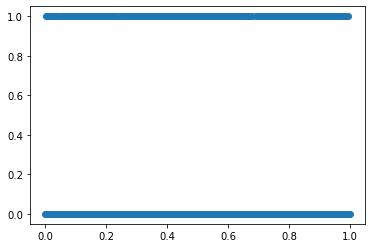

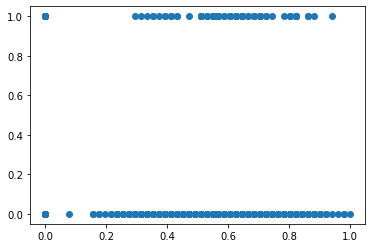

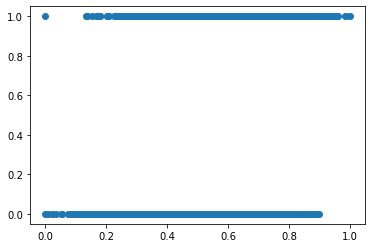

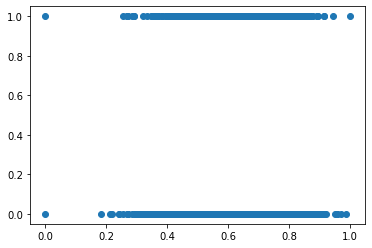

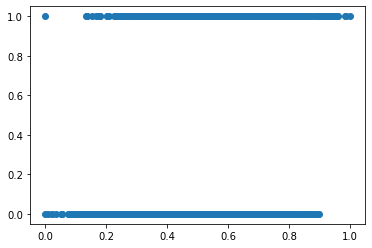

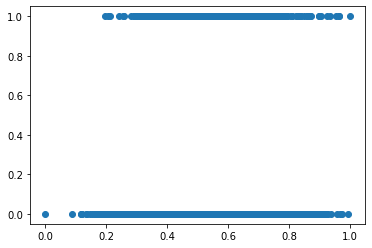

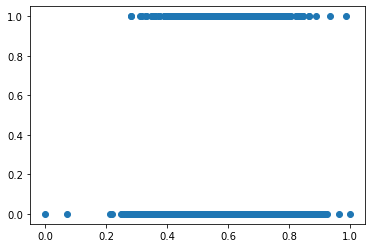

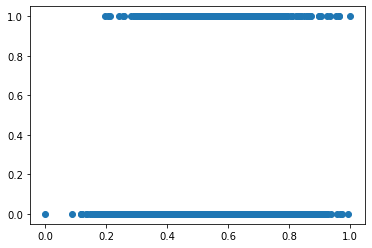

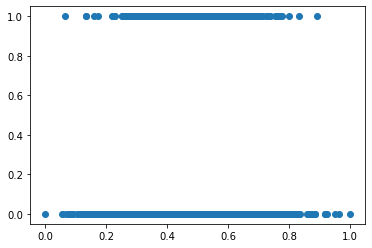

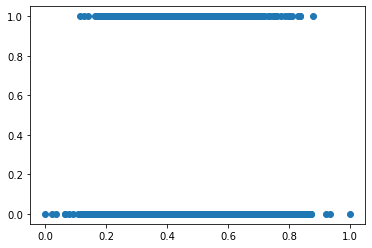

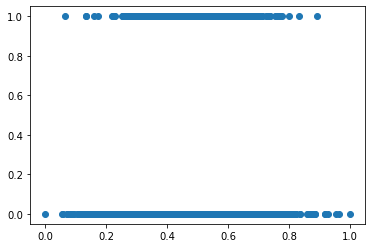

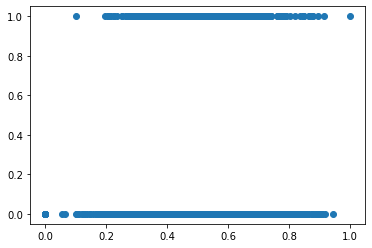

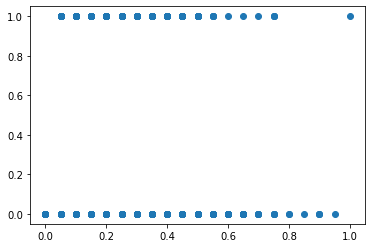

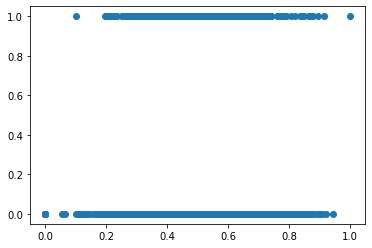

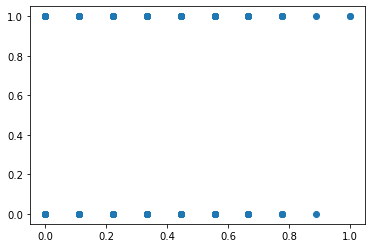

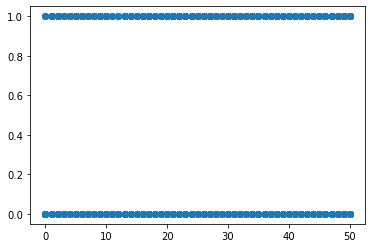

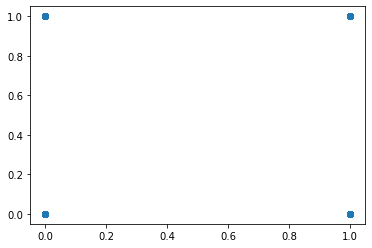

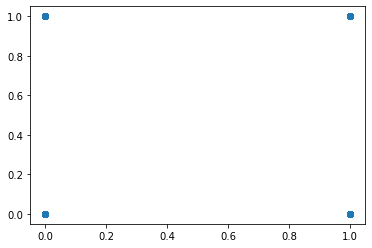

In [83]:
for feature in train.columns:
    if feature!="Churn":
        data = train.copy()
        plt.scatter(data[feature],data["Churn"])
        plt.show()

In [84]:
train = train.drop("State",axis=1)

In [85]:
train.head()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,International_Plan,Voice_Mail_Plan,Churn
0,0.524793,0.068627,0.577324,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,1,0
1,0.438017,0.068627,0.465252,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,1,0
2,0.561983,0.068627,0.324185,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,0
3,0.342975,0.000000,0.509895,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,1,0,0
4,0.305785,0.068627,0.037092,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,1,0,0


In [91]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [92]:
train["Churn"].unique()

array([0, 1])

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [96]:
print("length of xtrain is {}".format(len(x_train)))
print("length of xtest is {}".format(len(x_test)))

length of xtrain is 2333
length of xtest is 1000


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
def select(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [101]:
select(LogisticRegression(),x_train,x_test,y_train,y_test)

0.869

In [102]:
select(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

0.912